# TFP

Tensorflow probability model is a structural timeseries model. In this model it basically decomposes time series in various structural component. it try to learn seasonality, trends and past lags estimate. we can add additional external driver as well through design metrics.

Import all the requires packages. we are using statsmodel 0.10.0 latest stable version.need to be cautious while using date time.

In [62]:
#import all the packages...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import tensorflow_probability as tfp
import tensorflow as tf
import itertools
import warnings
warnings.filterwarnings("ignore")
from dateutil import relativedelta
import datetime

load data from excel file. we can add up workbook sheet as well in which we can import multiple sheets but here as single sheet is required hence directly read_excel works fine.

In [87]:
# df = pd.read_excel('China_Brand_Multivariate_Data_17Mar.xlsx')
df = pd.read_excel('China_Brand_Daily_data.xlsx')

In [84]:
df.columns

Index(['Date', 'Day', 'Brand_Family', 'Volume', 'Moderate', 'Severe',
       'Critical', 'Post_Peak', 'confirmed', 'deaths', 'recovered', 'active',
       'active_lag_4', 'active_lag_8', 'Selling_days', 'Chinese_New_Year',
       'Chinese_New_Year_Build', 'Dragon_Boat_Festival', 'Labour_Day',
       'Mid_Autumn_Festival', 'National_Day', 'New_Year', 'Qing_Ming_Jie',
       'Consumer_Price_Index_month', 'Index_Retail_Sales_Real_month',
       'Industrial_Production_Index_month',
       'Real_Fixed_Investment_lcu_quarter',
       'Real_NIA_Exports_of_Goods_&_Non_Factor_Services_lcu_quarter',
       'Real_NIA_Imports_of_Goods_&_Non_Factor_Services_lcu_quarter',
       'Real_GDP_lcu_quarter', 'Real_Consumption_Total_lcu_quarter',
       'Real_Government_Consumption_lcu_quarter',
       'Real_Private_Consumption_lcu_quarter',
       'Wholesale_Producer_Price_Index_LCU_basus_month',
       'Interest_Rate_Short_Term_Real_month',
       'Real_Price_of_Crude_Oil_LCU_basis_annual', 'Unemployment

In [ ]:
#   m <- add_regressor(m, 'Moderate')
#   m <- add_regressor(m, 'Severe')
#   m <- add_regressor(m, 'Critical')
#   m <- add_regressor(m, 'Post_Peak')
#   m <- add_regressor(m, 'Chinese_New_Year')
#   m <- add_regressor(m, 'Chinese_New_Year_Build')
#   m <- add_regressor(m, 'Dragon_Boat_Festival')
#   m <- add_regressor(m, 'Labour_Day')
#   m <- add_regressor(m, 'Mid_Autumn_Festival')
#   m <- add_regressor(m, 'National_Day')
#   m <- add_regressor(m, 'New_Year')
#   m <- add_regressor(m, 'Qing_Ming_Jie')
#   m <- add_regressor(m, 'Consumer_Price_Index_month')
#   m <- add_regressor(m, 'Index_Retail_Sales_Real_month')
#   m <- add_regressor(m, "Real_Fixed_Investment_lcu_quarter")
#   m <- add_regressor(m, 'Wholesale_Producer_Price_Index_LCU_basus_month')
#   m <- add_regressor(m, 'PMI_Redefined')
#   m <- add_regressor(m, 'Unemployment_Rate_quarter'
np.ma

In [88]:
df['Month'] = df.Date.dt.month
df['Year'] = df.Date.dt.year
df = df.groupby(['Brand_Family','Year','Month']).agg({'Volume': np.sum,
                                                 'PMI_Redefined':'first',
                                                 'Unemployment_Rate_quarter':'first',
                                                 'Wholesale_Producer_Price_Index_LCU_basus_month':'first',
                                                'Real_Fixed_Investment_lcu_quarter':'first',
                                                'Index_Retail_Sales_Real_month':'first',
                                                'Consumer_Price_Index_month':'first',
                                                  'Qing_Ming_Jie':np.max,
                                                    'New_Year':np.max,
                                                    'National_Day':np.max,
                                                    'Mid_Autumn_Festival':np.max,
                                                    'Labour_Day':np.max,
                                                    'Dragon_Boat_Festival':np.max,
                                                    'Chinese_New_Year_Build':np.max,
                                                     'Chinese_New_Year':np.max,
                                                      'Post_Peak':np.max,
                                                      'Critical':np.max,
                                                      'Severe':np.max,
                                                      'Moderate':np.max
                                                     })
df = df.reset_index()
df['Date']=pd.to_datetime(df['Year'].astype('str')+str("-")+df.Month.astype('str')+str('-')+str('01'))

In [89]:
df.rename(columns={'Brand_Family':'Key'},inplace=True)

In [4]:
#df = df[['Key','Date','Volume','avg_T','Selling_days_ratio','PMI','Inflation_Rate','Growth_rate']]
#'PMI','Inflation_Rate','Selling_days_ratio'
#'precipitation','Selling_days_ratio','PMI','Inflation_Rate'

In [31]:
# df = df.loc[df['Brand Family'] == 'BUD']
# df.drop(columns=['Brand Family'],axis=1,inplace=True)

In [ ]:
# df.columns
# X=df[['Date','Key','Volume','Selling_days','avg_T','precipitation','Lag_GTO_Vol','Consumer_Price_Index_month',
#       'Real_GDP_lcu_quarter','Unemployment_Rate_quarter','BGT_Volume']]
#X=df[['Date','Key','Volume','Selling_days','avg_T','precipitation']]
# X = df[['Date','Key','VIC_Vol','Selling_days']]

In [ ]:
# X_holiday = df.iloc[:,84:]

In [ ]:
#X=df[['Date','Key','Volume','avg_T','precipitation','GTO_Vol','Disc_Vol']]

In [ ]:
# X = df[['Date','Key','Volume','GTO_Vol','Disc_Vol','Industrial_Production_Index_month','Unemployment_Rate_quarter',
#          'Terms_of_Trade_annual','Exchange_Rate_Index_Period_Average_month','Exchange_Rate_LCU_per_US_Period_Average_month',
#         'Real_Consumption_Per_Capita_US_quarter','Wholesale_Producer_Price_Index_LCU_basus_month','Nominal_Private_Consumption_lcu_quarter',
#         'Consumer_Price_Index_month','Nominal_GDP_Per_Capita_US_quarter']]


# X = pd.concat([X,df[['Industrial_Production_Index_month','Unemployment_Rate_quarter','Terms_of_Trade_annual',
#                     'Consumer_Price_Index_month','Nominal_GDP_Per_Capita_US_quarter']]],axis=1)

#X = pd.concat([X,df[['Nominal_GDP_Per_Capita_US_quarter']]],axis=1)

In [ ]:
#All holiday variable....
#X = pd.concat([X,df.iloc[:,84:]],axis=1)

In [ ]:
# df = X.copy()

In [ ]:
# df['qtr_year'] = df.Date.dt.quarter.astype("str")+str("_")+df.Date.dt.year.astype("str")
# tmp = df.groupby(by=['Key','qtr_year'])['BGT_Volume'].sum()
# tmp = pd.DataFrame(tmp)
# tmp.columns = ['BGT_qtr_Vol']
# tmp.reset_index(inplace=True)
# df = pd.merge(df,tmp,how='left',on=['Key','qtr_year'])
# df.drop(columns=['qtr_year'],inplace=True)

In [ ]:
# df['year'] = df.Date.dt.year
# tmp = df.groupby(by=['Key','year'])['BGT_Volume'].sum()
# tmp = pd.DataFrame(tmp)
# tmp.columns = ['BGT_year_Vol']
# tmp.reset_index(inplace=True)
# df = pd.merge(df,tmp,how='left',on=['Key','year'])
# df.drop(columns=['year'],inplace=True)

In [ ]:
# df['qtr'] = df.Date.dt.quarter
# df['month'] = df.Date.dt.month

In [ ]:
# def bgt_transformation(brand_df):
#     brand_df['qtr_year'] = brand_df.Date.dt.quarter.astype(str)+str("_")+brand_df.Date.dt.year.astype(str)
#     brand_df['cum_sum_bgt_qtr'] = brand_df.groupby(by=['qtr_year'])['BGT_Volume'].cumsum()
#     brand_df['BGT_qtr_ratio']= brand_df['cum_sum_bgt_qtr'].divide(brand_df['BGT_qtr_Vol'])
#     brand_df['cum_sum_vol_qtr'] = brand_df.groupby(by=['qtr_year'])['Volume'].cumsum()
#     brand_df['cum_sum_vol_qtr_shift'] = brand_df['cum_sum_vol_qtr'].shift(1)
#     brand_df.loc[((brand_df.month==1)|(brand_df.month==4)|(brand_df.month==7)|(brand_df.month==10)),'cum_sum_vol_qtr_shift'] = 0
#     brand_df['bgt_diff_till_month'] = brand_df['BGT_qtr_Vol'] - brand_df['cum_sum_vol_qtr_shift']
#     brand_df.drop(columns=['qtr_year','cum_sum_bgt_qtr','cum_sum_vol_qtr','cum_sum_vol_qtr_shift'],inplace=True)
#     return brand_df

Convert date column in datetime format as we have to create index as datetime format only. be careful while giving format of date as it might change later operations.
get the unique brand list as we have to iterate over all the brands separately.

In [91]:
df.Date = pd.to_datetime(df.Date,format='%d-%m-%Y')
Brand_list = df.Key.unique()
#Brand_list = ['BUD']

For modelling we follow differnt steps:
1. iterate over all brands and take out single brand each time.
2. provide train and test date based on requirement.
3. divide train and test data as le cycle works for whole year. ex apr is start so (3+9,4+8 etc..) each time upto december we have to complete, start date could be any.
4. extract the linear trends from the timeseries.
5. extract seasonal pattern from timeseries.
6. if any external drivers then add up using linear regression method in design metric.
7. append up in the list and use sum function of sts.
8. Build surrogate posterior model for the given model to get the optimum value. optimum values it selects from the given samples relatively. ex. if user has provided 50 samples then model will iterate 50 times in surrogate model where it will compare optimal value and at end whichever is more correct it will use it.
9. try optimizing using adam optimizer. we can have differnt optimizer as well like rmsprop etc.
10. forecast for required no of steps ( basically ahead month or year based on freuqency).
11. save the result and iterate till end.


In [92]:
final = pd.DataFrame(columns=["Brand","Forecast_values","Actual_values"])
#iterate for all the brands...
seed_value = 123
for brand_name in Brand_list:
    print(brand_name)
    
    brand_df = df.loc[df.Key == brand_name]
    #brand_df = bgt_transformation(brand_df)
    brand_df.set_index('Date',inplace=True)
    tmp = []
    #brand_df = brand_df[:'2019-12-01']
    forecast = pd.DataFrame()
    Actuals = pd.DataFrame()
    p = pd.DataFrame()
    k = pd.DataFrame()
    #run for le cycle 3+9,4+8 etc....  
    tf.random.set_seed(seed_value)
    flag_option = True
    flag_month_feb = 3
    flag_month_july = 8
    if len(brand_df)>12:
        train_start = datetime.date(2019, 3, 1)
        train_till = datetime.date(2020, 12, 1)
        Actuals_end = datetime.date(2020, 2, 1)
        train_date = train_start
        while train_date < train_till:
            model = None
            test_date = train_date + relativedelta.relativedelta(months=1)
            dependent_colume = 'Volume'
            x = brand_df.drop(columns=[dependent_colume,'Key'])
            y = brand_df[[dependent_colume]]
            train_x = x[:train_date]
            train_y = y[:train_date][[dependent_colume]]
            test_x = x[test_date:]
            test_y = y[test_date:][[dependent_colume]]
            train_date = train_date + relativedelta.relativedelta(months=1)
            try:
                my_list = []
                t = dict()
                
                                    
                if ((flag_option == True) and (flag_month_july == test_date.month)) :
                    print("july imputation")
                    train_y['2019-07-01':'2019-07-01'] = np.average(train_y.loc[((train_y.index.month == 7) & 
                                                                                 ((train_y.index.year>=2016) & (train_y.index.year<=2018)))])
                    
                if ((flag_option == True) and (flag_month_feb == test_date.month)) :
                    print("feb imputation")
                    train_y['2020-02-01':'2020-02-01'] = np.average(train_y.loc[((train_y.index.month == 2) & 
                                                                                 ((train_y.index.year>=2017) & (train_y.index.year<=2019)))])  
                
                # extrating linear trend parameter from series 
                trend = tfp.sts.LocalLinearTrend(observed_time_series=np.array(train_y))
                
                # extrating seasonal parameter from series 
                seasonal = tfp.sts.Seasonal(num_seasons=12, observed_time_series=np.array(train_y))

                my_list.append(trend)
                my_list.append(seasonal)

                    
                
                if test_date < Actuals_end:
                    test_x = test_x[test_date:test_date]
                for i in train_x.columns:
                    t[str(i)] = tfp.sts.LinearRegression(design_matrix=tf.concat([tf.reshape(np.array(train_x[i].astype(float)),(-1,1)),
                                                                        tf.reshape(np.array(test_x[i].astype(float)),(-1,1))],axis=-2),name=i)
                    my_list.append(t[str(i)])
                #creating strcutural model = ts + trend + seasonal
                model = tfp.sts.Sum(my_list, observed_time_series=np.array(train_y))
        #         #build surrogate model for getting optimal prior value...
                variational_posteriors = tfp.sts.build_factored_surrogate_posterior(model=model,seed=seed_value)
                num_variational_steps = 200
                num_variational_steps = int(num_variational_steps)
                optimizer = tf.optimizers.Adam(learning_rate=.1)


        #         #generating different posterior samples...
                q_samples_co2_ = variational_posteriors.sample(50,seed=seed_value)
            
                seed_value = seed_value + 1
                print(seed_value)
                
                if test_date > Actuals_end:
                    print(test_date)
                    p = pd.DataFrame()
                    model_forecast_dist = tfp.sts.forecast(model,observed_time_series=np.array(train_y),parameter_samples=q_samples_co2_,num_steps_forecast=len(test_x))
                    p["Forecast_values"] =np.array(tfp.sts.forecast(model,observed_time_series=np.array(train_y),parameter_samples=q_samples_co2_,num_steps_forecast=len(test_x)).mean()).ravel()
                    p.index = test_y[test_date:].index
                    p["Brand"] = str(brand_name) +str("_")+ p.index.month.astype(str) +str("_")+p.index.year.astype(str)
            
                    
                    k = pd.DataFrame()
                    k = test_y[test_date:]
                    k.columns = ['Actual_values']
                    k.index = test_y[test_date:].index
                    k["Brand"] = str(brand_name) +str("_")+ k.index.month.astype(str) +str("_")+k.index.year.astype(str)

                    break
                 
                
                co2_forecast_dist = tfp.sts.forecast(model,observed_time_series=np.array(train_y),parameter_samples=q_samples_co2_,num_steps_forecast=1)

                forecast[str(brand_name)+str('_')+str(test_date.month)+str("_")+str(test_date.year)] = np.array(co2_forecast_dist.mean())[0]
                Actuals[str(brand_name)+str('_')+str(test_date.month)+str("_")+str(test_date.year)] = test_y[:test_date].values[0]
            except Exception as e:
                print(e)
                print("exception")
                continue

        if ((len(forecast)>0) & (len(Actuals)>0)):
            forecast=forecast.T.reset_index()
            forecast.columns=["Brand","Forecast_values"]
            if len(p)>0:
                forecast= pd.concat([forecast,p],axis=0)
            Actuals=Actuals.T.reset_index()
            Actuals.columns=["Brand","Actual_values"]
            if len(k)>0:
                Actuals= pd.concat([Actuals,k],axis=0)
            brand_wise_merge = forecast.merge(Actuals,on="Brand",how="left")
            final = final.append(brand_wise_merge,ignore_index=True)
        else:
            print("doesn't match with TFP")
    else:
        print("length mismatch")

BGB
124
125
126
127
july imputation
128
129
130
131
132
133
134
feb imputation
135
2020-03-01
BUD
136
137
138
139
july imputation
140
141
142
143
144
145
146
feb imputation
147
2020-03-01
HBI
148
149
150
151
july imputation
152
153
154
155
156
157
158
feb imputation
159
2020-03-01
HBO
160
161
162
163
july imputation
164
165
166
167
168
169
170
feb imputation
171
2020-03-01
HKOW
172
173
174
175
july imputation
176
177
178
179
180
181
182
feb imputation
183
2020-03-01
ISP
184
185
186
187
july imputation
188
189
190
191
192
193
194
feb imputation
195
2020-03-01
NearBeer
196
indices = 22 is not in [0, 22) [Op:GatherV2]
exception
197
indices = 22 is not in [0, 22) [Op:GatherV2]
exception
198
indices = 22 is not in [0, 22) [Op:GatherV2]
exception
199
indices = 22 is not in [0, 22) [Op:GatherV2]
exception
july imputation
200
indices = 22 is not in [0, 22) [Op:GatherV2]
exception
201
indices = 22 is not in [0, 22) [Op:GatherV2]
exception
202
indices = 22 is not in [0, 22) [Op:GatherV2]
excepti

In [93]:
final.head(30)

,Brand,Forecast_values,Actual_values
0,BGB_4_2019,5.256351e+04,7.143912e+04
1,BGB_5_2019,8.607070e+04,8.167310e+04
2,BGB_6_2019,8.698505e+04,1.126363e+05
3,BGB_7_2019,1.262172e+05,1.135349e+05
4,BGB_8_2019,8.665325e+04,1.109295e+05
5,BGB_9_2019,1.134586e+05,1.153397e+05
6,BGB_10_2019,1.106891e+05,8.737509e+04
7,BGB_11_2019,9.825765e+04,8.527288e+04
8,BGB_12_2019,8.583593e+04,7.658496e+04
9,BGB_1_2020,8.210480e+04,9.548433e+04


In [ ]:
# final = pd.DataFrame(columns=["Brand","Forecast_values","Actual_values"])
# #iterate for all the brands...
# for brand_name in Brand_list:
#     print(brand_name)
#     brand_df = df.loc[df.Key == brand_name]
#     #brand_df = bgt_transformation(brand_df)
#     brand_df.set_index('Date',inplace=True)
#     tmp = []
#     brand_df = brand_df[:'2019-12-01']
#     forecast = pd.DataFrame()
#     Actuals = pd.DataFrame()
#     #run for le cycle 3+9,4+8 etc....
#     if len(brand_df)>12:
#         for i in range(9,0,-1):
#             train_date = brand_df.index.max() - relativedelta.relativedelta(months=i)
#             test_date = train_date + relativedelta.relativedelta(months=1)
            
#             print(train_date)
#             print(test_date)
            
#             dependent_colume = 'Volume'
#             x = brand_df.drop(columns=[dependent_colume,'Key'])
#             y = brand_df[[dependent_colume]]
#             train_x = x[:train_date]
#             train_y = y[:train_date][[dependent_colume]]
#             test_x = x[test_date:test_date]
#             test_y = y[test_date:test_date][[dependent_colume]]
            
#             print(test_y)

#             try:
#                 my_list = []
#                 t = dict()
#                 # extrating linear trend parameter from series 
#                 trend = tfp.sts.LocalLinearTrend(observed_time_series=np.array(train_y))
#                 # extrating seasonal parameter from series 
#                 seasonal = tfp.sts.Seasonal(num_seasons=12, observed_time_series=np.array(train_y))

#                 my_list.append(trend)
#                 my_list.append(seasonal)


#                 for i in train_x.columns:
#                     t[str(i)] = tfp.sts.LinearRegression(design_matrix=tf.concat([tf.reshape(np.array(train_x[i].astype(float)),(-1,1)),
#                                                                         tf.reshape(np.array(test_x[i].astype(float)),(-1,1))],axis=-2),name=i)
#                     my_list.append(t[str(i)])

#                 #creating strcutural model = ts + trend + seasonal
#                 model = tfp.sts.Sum(my_list, observed_time_series=np.array(train_y))
#         #         #build surrogate model for getting optimal prior value...
#                 variational_posteriors = tfp.sts.build_factored_surrogate_posterior(model=model)
#                 num_variational_steps = 200
#                 num_variational_steps = int(num_variational_steps)
#                 optimizer = tf.optimizers.Adam(learning_rate=.1)

#         #         #checking cost loss...
#         #         elbo_loss_curve = tfp.vi.fit_surrogate_posterior(target_log_prob_fn=model.joint_log_prob(
#         #             observed_time_series=np.array(train_y)),surrogate_posterior=variational_posteriors,optimizer=optimizer,num_steps=num_variational_steps)

#         #         #generating different posterior samples...
#                 q_samples_co2_ = variational_posteriors.sample(50)

#                 co2_forecast_dist = tfp.sts.forecast(model,observed_time_series=np.array(train_y),parameter_samples=q_samples_co2_,num_steps_forecast=1)

#                 forecast[str(brand_name)+str('_')+str(test_date.month)] = np.array(co2_forecast_dist.mean())[0]
#                 print(test_y[:test_date].values[0])
#                 Actuals[str(brand_name)+str('_')+str(test_date.month)] = test_y[:test_date].values[0]
#             except:
#                 continue

#         if (len(forecast)>0 & len(Actuals>0)):
#             forecast=forecast.T.reset_index()
#             forecast.columns=["Brand","Forecast_values"]
#             Actuals=Actuals.T.reset_index()
#             Actuals.columns=["Brand","Actual_values"]
#             brand_wise_merge = forecast.merge(Actuals,on="Brand",how="left")
#             final = final.append(brand_wise_merge,ignore_index=True)
#         else:
#             print("doesn't match with TFP")
#     else:
#         print("length mismatch")

Calculate the accuracy which is mape (1- ABS(actual-forcast)/actual). we use mape as it is unit less and later can multiply with 100 so we can get results in percentage.

In [94]:
final['Error']=np.abs(final['Actual_values']-final['Forecast_values'])
final[['Brandname','leMonth','leYear']] = final.Brand.str.split("_",expand=True)

In [95]:
Agg_accuracy = final.groupby(by=['leMonth','leYear']).sum()[['Error','Actual_values']]
Agg_accuracy['Accuracy'] = np.round((1-(Agg_accuracy['Error']/Agg_accuracy['Actual_values']))*100,2)

In [96]:
Agg_accuracy_brand = final.groupby(by=['Brandname']).sum()[['Error','Actual_values']]
Agg_accuracy_brand['Accuracy'] = np.round((1-(Agg_accuracy_brand['Error']/Agg_accuracy_brand['Actual_values']))*100,2)

In [40]:
Agg_accuracy

Error  Actual_values  Accuracy
leMonth leYear                                       
1       2020    1.160091e+06   6.900583e+06     83.19
10      2019    9.170603e+05   4.416749e+06     79.24
        2020    6.232682e+06   0.000000e+00      -inf
11      2019    5.928967e+05   3.823504e+06     84.49
        2020    6.404637e+06   0.000000e+00      -inf
12      2019    6.965786e+05   3.183298e+06     78.12
        2020    6.460776e+06   0.000000e+00      -inf
2       2020    2.764881e+06   5.238237e+05   -427.83
3       2020    4.007379e+06   1.380520e+06   -190.28
4       2019    5.626203e+05   5.933627e+06     90.52
        2020    5.273710e+06   0.000000e+00      -inf
5       2019    5.883117e+05   7.822329e+06     92.48
        2020    6.683314e+06   0.000000e+00      -inf
6       2019    6.553467e+05   8.941870e+06     92.67
        2020    7.545914e+06   0.000000e+00      -inf
7       2019    1.751911e+06   7.779457e+06     77.48
        2020    7.343292e+06   0.000000e+00      -inf
8       2019    6.920097e+05   8.775660e+06     92.11
        2020    8.170293e+06   0.000000e+00      -inf
9       2019    1.078257e+06   6.423658e+06     83.21
        2020    7.170539e+06   0.000000e+00      -inf

In [97]:
final.to_excel('./TFP/TFP_Bayesian_Brand_allsel_Aggregatedmonthly_vol.xlsx')

In [21]:
def plot_components(dates,component_means_dict,component_stddevs_dict,x_locator=None,x_formatter=None):
    
    """Plot the contributions of posterior components in a single figure."""
    colors = sns.color_palette()
    c1, c2 = colors[0], colors[1]
    axes_dict = collections.OrderedDict()
    num_components = len(component_means_dict)
    fig = plt.figure(figsize=(12, 2.5 * num_components))
    for i, component_name in enumerate(component_means_dict.keys()):
        
        component_mean = component_means_dict[component_name]
        component_stddev = component_stddevs_dict[component_name]

        ax = fig.add_subplot(num_components,1,1+i)
        ax.plot(dates, component_mean, lw=2)
        ax.fill_between(dates,
                         component_mean-2*component_stddev,
                         component_mean+2*component_stddev,
                         color=c2, alpha=0.5)
        ax.set_title(component_name)
        if x_locator is not None:
            ax.xaxis.set_major_locator(x_locator)
            ax.xaxis.set_major_formatter(x_formatter)
        axes_dict[component_name] = ax
    fig.autofmt_xdate()
    fig.tight_layout()
    return fig, axes_dict

In [22]:

# Get the distributions over component outputs from the posterior marginals on
# training data, and from the forecast model.
component_dists = tfp.sts.decompose_by_component(
    model,
    observed_time_series=np.array(train_y),
    parameter_samples=q_samples_co2_)

forecast_component_dists = tfp.sts.decompose_forecast_by_component(
    model,
    forecast_dist=model_forecast_dist,
    parameter_samples=q_samples_co2_)

In [23]:
demand_component_means_, demand_component_stddevs_ = (
    {k.name: c.mean() for k, c in component_dists.items()},
    {k.name: c.stddev() for k, c in component_dists.items()})

(
    demand_forecast_component_means_,
    demand_forecast_component_stddevs_
) = (
    {k.name: c.mean() for k, c in forecast_component_dists.items()},
    {k.name: c.stddev() for k, c in forecast_component_dists.items()}
    )

In [24]:
demand_dates = pd.date_range('2014-01-01','2020-12-01', freq='MS')

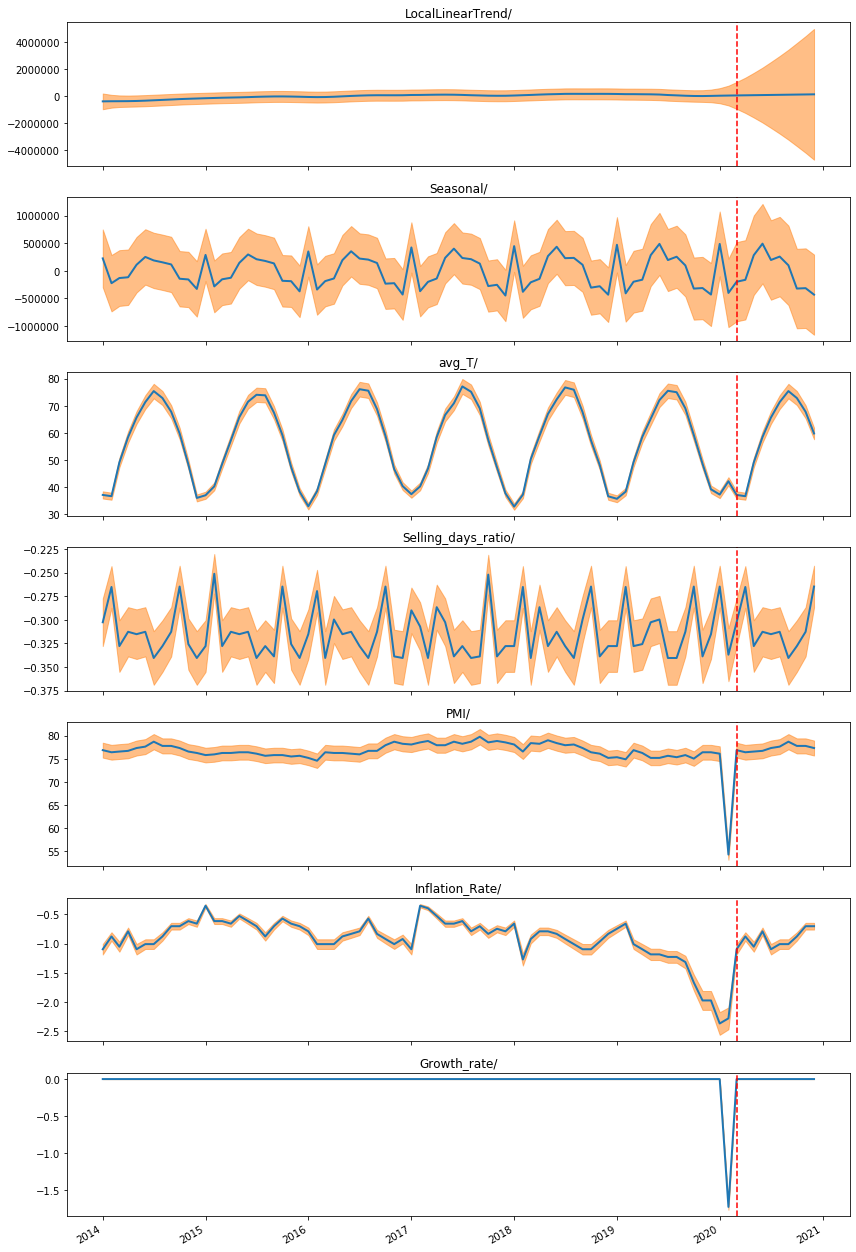

In [25]:
import collections
# Concatenate the training data with forecasts for plotting.
component_with_forecast_means_ = collections.OrderedDict()
component_with_forecast_stddevs_ = collections.OrderedDict()
for k in demand_component_means_.keys():
    component_with_forecast_means_[k] = np.concatenate([
      demand_component_means_[k],
      demand_forecast_component_means_[k]], axis=-1)
    component_with_forecast_stddevs_[k] = np.concatenate([
      demand_component_stddevs_[k],
      demand_forecast_component_stddevs_[k]], axis=-1)

#print(len(component_with_forecast_means_['LocalLinearTrend/']))
    
fig, axes = plot_components(
  demand_dates,
  component_with_forecast_means_,
  component_with_forecast_stddevs_,
  x_locator=None, x_formatter=None)
for ax in axes.values():
    ax.axvline(demand_dates[-10], linestyle="--", color='red')